In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [2]:
data=pd.read_csv(r"C:\Users\ronob\Desktop\my project\Data\clean_sales_data.csv")

In [5]:
df=pd.DataFrame(data)
df

,Inventory,Customer Type,Gender,City,Product Line,Unit Price,Quantity,Tax 16%,Total,Payment,COGS,Gross Margin Percentage,Gross Income,Rating,Branch
0,INV00001,Normal,Male,Mombasa,Baby Items,117.155215,4,74.979337,543.600196,Cash,468.620858,0.410256,192.254436,4,Carrefour
1,INV00002,Normal,Male,Nairobi,Groceries,15.526817,4,9.937163,72.044429,M-pesa,62.107267,0.223745,13.896178,7,Naivas
2,INV00003,Normal,Female,Nairobi,Prepared Food,182.657062,3,87.675390,635.646575,Credit card,547.971185,0.475155,260.371089,5,Naivas
3,INV00004,Normal,Female,Kisumu,Sports and travel,94.577285,2,30.264731,219.419302,Cash,189.154571,0.253906,48.027412,2,Quickmart
4,INV00005,Normal,Female,Kisumu,Prepared Food,191.212780,1,30.594045,221.806825,Cash,191.212780,0.282137,53.948214,1,Carrefour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,INV39996,Member,Male,Mombasa,Groceries,169.826321,8,217.377691,1575.988257,M-pesa,1358.610566,0.355974,483.630323,2,Naivas
39996,INV39997,Member,Female,Nairobi,Sports and travel,185.650169,2,59.408054,430.708392,M-pesa,371.300338,0.409910,152.199784,2,Naivas
39997,INV39998,Member,Male,Nairobi,Prepared Food,35.289073,5,28.231258,204.676621,Cash,176.445363,0.211486,37.315675,4,Naivas
39998,INV39999,Member,Male,Nairobi,Sports and travel,34.620505,7,38.774966,281.118500,Credit card,242.343535,0.352787,85.495630,2,Carrefour


In [6]:
df.describe()


,Unit Price,Quantity,Tax 16%,Total,COGS,Gross Margin Percentage,Gross Income,Rating
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,102.451772,5.487875,89.938306,652.052722,562.114415,0.349976,196.748303,2.993425
std,56.111770,2.878126,73.149118,530.331105,457.181987,0.086605,171.992811,1.222301
min,5.001295,1.000000,0.800229,5.801663,5.001433,0.200010,1.020455,1.000000
25%,53.933260,3.000000,29.006874,210.299839,181.292965,0.274828,61.356878,2.000000
50%,101.907406,5.000000,69.247184,502.042087,432.794902,0.350778,145.291124,3.000000
75%,151.002730,8.000000,134.632397,976.084879,841.452482,0.425336,285.843230,4.000000
max,199.997075,10.000000,319.995320,2319.966073,1999.970752,0.499983,980.642215,7.000000


In [7]:
# Calulating count for specific columns
value_counts = df.groupby(['Gender', 'City','Branch']).size()
value_counts



Gender  City     Branch   
Female  Kisumu   Carrefour    1527
                 Naivas       2503
                 Quickmart    1284
        Mombasa  Carrefour    2045
                 Naivas       3310
                 Quickmart    1735
        Nairobi  Carrefour    3127
                 Naivas       5071
                 Quickmart    2647
Male    Kisumu   Carrefour    1075
                 Naivas       1731
                 Quickmart     959
        Mombasa  Carrefour    1501
                 Naivas       2335
                 Quickmart    1322
        Nairobi  Carrefour    2254
                 Naivas       3613
                 Quickmart    1961
dtype: int64

In [8]:
#analysis of customer type
total_customers = len(df)
customer_count=df['Customer Type'].value_counts()
norm_percent=(customer_count['Normal']/total_customers)*100
memb_percent=(customer_count['Member']/total_customers)*100
customer_count



Normal    24800
Member    15200
Name: Customer Type, dtype: int64

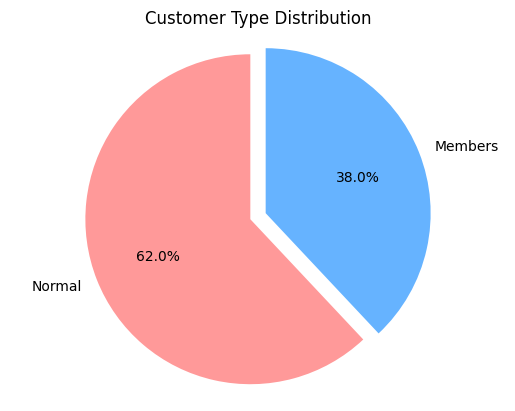

In [9]:
# Data for the pie chart
labels = ['Normal', 'Members']
sizes = [norm_percent, memb_percent]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)

# Plot the pie chart with labels
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.title('Customer Type Distribution', color='black')
plt.show()


<Figure size 800x600 with 0 Axes>

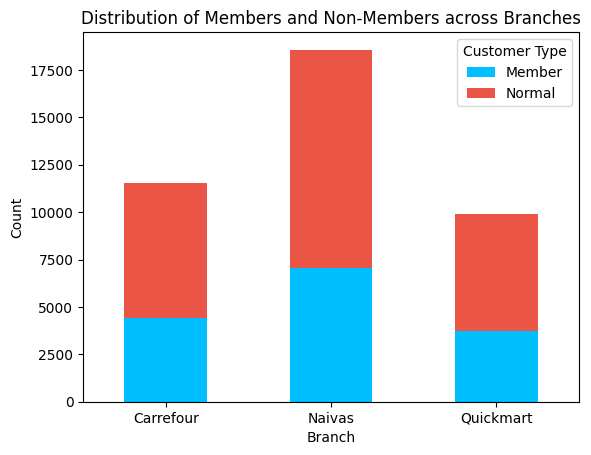

In [15]:

# Calculate the counts of members and non-members for each branch
branch_counts = data.groupby(['Branch', 'Customer Type']).size().unstack()

# Create a stacked bar plot to compare members and non-members for each branch
plt.figure(figsize=(8, 6))
colors = ['#00bfff', '#ea5545']  
branch_counts.plot(kind='bar', stacked=True, color=colors)
plt.xlabel('Branch')
plt.ylabel('Count')
plt.title('Distribution of Members and Non-Members across Branches')
plt.xticks(rotation=int("0"))
plt.legend(title='Customer Type')
plt.show()

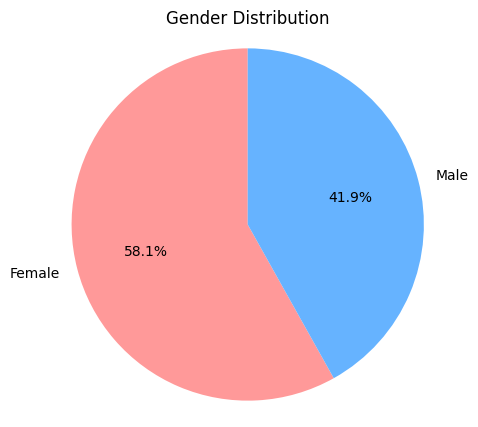

In [11]:
# Calculate the gender distribution
gender_counts = df['Gender'].value_counts()

# Create a pie chart to visualize the gender distribution
plt.figure(figsize=(5, 5))
colors = ['#ff9999', '#66b3ff']  
plt.pie(gender_counts, labels=gender_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
 # Ensure pie is drawn as a circle
plt.axis('equal')
plt.show()

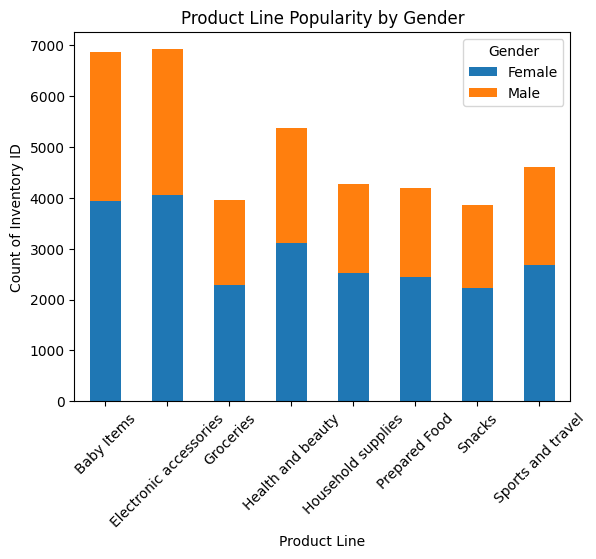

In [12]:
# Grouping data and counting their occurrence
grouped_data = df.groupby(['Inventory', 'Product Line', 'Gender']).size()
aggregated_data = grouped_data.groupby(['Product Line', 'Gender']).sum()

# Visualize the data using a stacked bar chart
aggregated_data.unstack().plot(kind='bar', stacked=True)
plt.xlabel('Product Line')
plt.ylabel('Count of Inventory ID')
plt.title('Product Line Popularity by Gender')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.show()


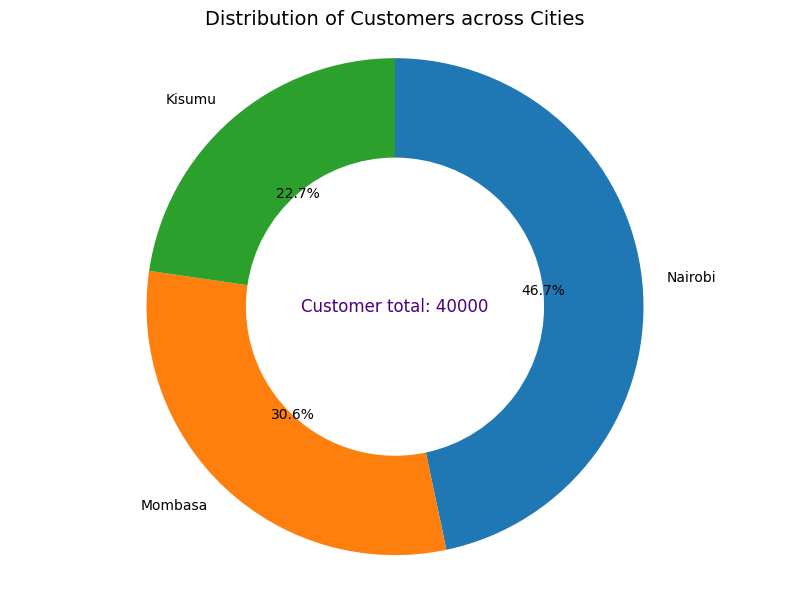

In [13]:
# Calculate the count of customers in each city
city_counts = df['City'].value_counts()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Create an exploded doughnut 
plt.figure(figsize=(8, 6))

# Plot
_, _, autotexts = plt.pie(city_counts.values, labels=city_counts.index, colors=colors,
                          startangle=90, counterclock=False, wedgeprops=dict(width=0.4), autopct='%1.1f%%')

for autotext in autotexts:
    autotext.set_fontsize(10)

#customer count
total_count = city_counts.sum()

# Display the total customer count in the center of the doughnut
plt.text(0, 0, f'Customer total: {total_count}', fontsize=12, color='indigo', ha='center', va='center')

plt.title('Distribution of Customers across Cities', fontsize=14,color='Black')
#  ensure that the doughnut is circular
plt.axis('equal')  
plt.tight_layout()
plt.show()


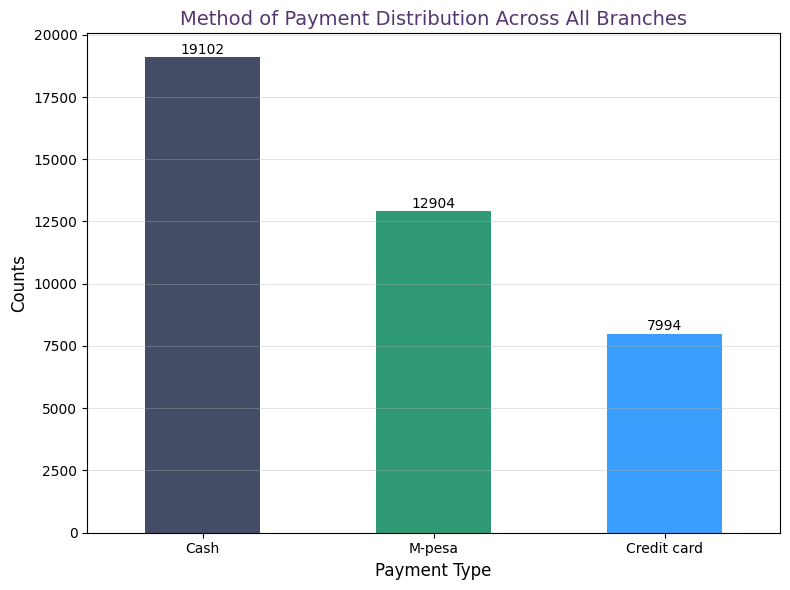

In [17]:
payment_counts=data['Payment'].value_counts()
#Analysing Payment distribution across all the branches
plt.figure(figsize=(8, 6))
colors = ['#454d66', '#309975', '#3a9efd']
payment_counts.plot(kind='bar', color=colors)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Method of Payment Distribution Across All Branches', fontsize=14, color='#553772')
plt.grid(axis='y', linestyle='-', linewidth=0.5, alpha=0.5)
plt.xticks(rotation=0)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adding data labels to the bars
for i, v in enumerate(payment_counts):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout() 
plt.show()

       City            Product Line         Total  Quantity
17  Nairobi  Electronic accessories  2.194187e+06     18154
16  Nairobi              Baby Items  2.072776e+06     17075
19  Nairobi       Health and beauty  1.660532e+06     14010
8   Mombasa              Baby Items  1.405121e+06     11714
9   Mombasa  Electronic accessories  1.376485e+06     11475
23  Nairobi       Sports and travel  1.367882e+06     11570
21  Nairobi           Prepared Food  1.298680e+06     10886
20  Nairobi      Household supplies  1.280242e+06     10925
18  Nairobi               Groceries  1.166580e+06     10121
22  Nairobi                  Snacks  1.163568e+06      9916
0    Kisumu              Baby Items  1.065336e+06      8909
11  Mombasa       Health and beauty  1.031316e+06      8574
1    Kisumu  Electronic accessories  1.008885e+06      8455
15  Mombasa       Sports and travel  9.147807e+05      7813
12  Mombasa      Household supplies  8.484478e+05      7254
13  Mombasa           Prepared Food  8.0